# Settings

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn
import copy

# Sigmoid function

In [0]:
def f(x):
  return np.exp(beta_0 + beta * x) / (1 + np.exp(beta_0 + beta * x))

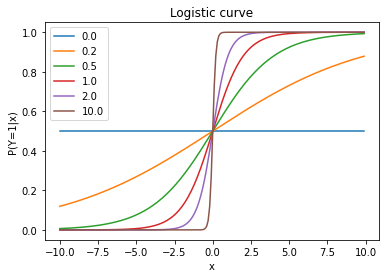

In [3]:
beta_0 = 0
beta_seq = np.array([0, 0.2, 0.5, 1, 2, 10])
x_seq = np.arange(-10, 10, 0.1)

plt.xlabel('x')
plt.ylabel('P(Y=1|x)')
plt.title('Logistic curve')

for i in range(beta_seq.shape[0]):
  beta = beta_seq[i]
  p = f(x_seq)
  plt.plot(x_seq, p, label='{}'.format(beta))

plt.legend(loc='upper left')

# Newton-Raphson

## x^2-1, x=2

In [0]:
def f(x):
  return x**2 - 1

In [0]:
def f_grad(x):
  return 2*x

In [0]:
x = 2
X = [x]
for i in range(100):
  x = x - f(x) / f_grad(x)
  X.append(x)
y = [0 for _ in range(len(X))]

In [0]:
X_line = np.arange(-1, 5, 0.1)
y_line = [f(x) for x in X_line]

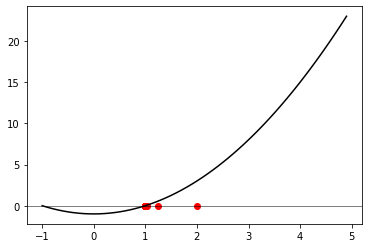

In [8]:
plt.axhline(y=0, c='black', linewidth=0.5)
plt.plot(X_line, y_line, color='black')
plt.scatter(X, y, color='red')
plt.show()

## f(x, y) = x^2 + y^2 - 1, g(x, y) = x + y, (x, y) = (1, 2)

In [0]:
def f(z):
  return z[0]**2 + z[1]**2 - 1

def dfx(z):
  return 2 * z[0]

def dfy(z):
  return 2 * z[1]

def g(z):
  return z[0] + z[1]

def dgx(z):
  return 1

def dgy(z):
  return 1

In [0]:
z = np.array([1, 2])
Z = []
for i in range(100):
  grad = np.array([[dfx(z), dfy(z)], [dgx(z), dgy(z)]])
  z = np.linalg.inv(grad)@np.array([f(z), g(z)])
  Z.append(z)
X = [z[0] for z in Z]
Y = [z[1] for z in Z]
F = [f(z) for z in Z]
G = [g(z) for z in Z]
Z = [0 for _ in range(len(Z))]

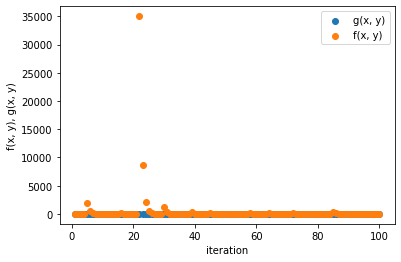

In [11]:
n_iter = [n for n in range(1, len(Z)+1)]
plt.xlabel('iteration')
plt.ylabel('f(x, y), g(x, y)')
plt.scatter(n_iter, G, label='g(x, y)')
plt.scatter(n_iter, F, label='f(x, y)')
plt.legend()
plt.show()

In [0]:
x_line = np.arange(-70, 70, 0.1)
y_line = np.arange(-70, 70, 0.1)
X_line = []
Y_line = []
F_line = []
G_line = []
for y in y_line:
  for x in x_line:
    X_line.append(x)
    Y_line.append(y)
    z = [x, y]
    F_line.append(f(z))
    G_line.append(g(z))

In [0]:
from mpl_toolkits.mplot3d import Axes3D

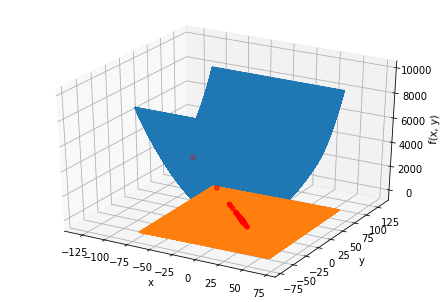

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
#ax.plot(x_line, y_line, F_line, label='f(x, y)')
#ax.plot(x_line, y_line, G_line, label='g(x, y)')
ax.plot(X_line, Y_line, F_line, label='f(x, y)')
ax.plot(X_line, Y_line, G_line, label='g(x, y)')
ax.scatter(X, Y, Z, label='z', color='red')
plt.show()

## 

In [15]:
N = 1000; p = 2
X = randn(N, p)
X = np.insert(X, 0, 1, axis=1)
beta = randn(p+1)
y = []
prob = 1 / (1 + np.exp(X@beta))
for i in range(N):
  if (np.random.rand(1) > prob[i]):
    y.append(1)
  else:
    y.append(-1)

beta

array([ 1.206399  , -0.07553442,  0.70097056])

In [16]:
beta = np.inf
gamma = randn(p+1)
print(gamma)
while (np.sum((beta-gamma)**2) > 0.001):
  beta = gamma
  s = X@beta
  v = np.exp(-s*y)
  u = (y*v) / (1+v)
  w = v / ((1+v)**2)
  W = np.diag(w)
  z = s+u/w
  gamma = np.linalg.inv(X.T@W@X)@X.T@z
  print(gamma)

[-1.2536916   0.35553201  0.48870986]
[16.54546993 -8.68900847 -6.89508048]
[-4.05127856e+22  2.20499475e+22  1.71674285e+22]
[nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


## Logistic Regression: N/2 for training, N/2 for test

In [0]:
n = 100
# generate datasets randomly
x = np.concatenate([randn(n)+1, randn(n)-1], 0)
y = np.concatenate([np.ones(n), -np.ones(n)], 0)
# 100 datasets for training, the others for test
train = np.random.choice(2*n, int(n), replace=False)
test = list(set(range(2*n)) - set(train))
X = np.insert(x[train].reshape(-1, 1), 0, 1, axis=1)
Y = y[train]

In [18]:
p = 1
beta = [0, 0]; gamma = randn(p+1)
print(gamma)
# training
while (np.sum((beta-gamma)**2) > 0.001):
  beta = gamma
  s = X@beta
  v = np.exp(-s*Y)
  u = (Y*v) / (1 + v)
  w = v / ((1+v)**2)
  W = np.diag(w)
  z = s + u/w
  gamma = np.linalg.inv(X.T@W@X)@X.T@W@z
  print(gamma)

[-0.69834646  1.89733199]
[-0.06153372  1.87205079]
[-0.07654424  2.00010553]
[-0.07798212  2.00974677]


In [0]:
def table_count(m, u, v):
  n = u.shape[0]
  count = np.zeros([m, m])
  for i in range(n):
    count[int(u[i]), int(v[i])] += 1
  return count

In [20]:
ans = y[test]
pred = np.sign(gamma[0]+x[test]*gamma[1])
ans = (ans+1)/2
pred = (pred+1)/2
table_count(2, ans, pred)

array([[45.,  6.],
       [10., 39.]])

table_count  
\[\[True-Negative, False-Negative\]  
 \[False-Positive, True-Positive\]\]


# Linear Discriminant Analysis, Quadratic Discriminant Analysis


## binary classification

In [0]:
mu_1 = np.array([2, 2]); sigma_1 = 2; sigma_2 = 2; rho_1 = 0
mu_2 = np.array([-3, -3]); sigma_3 = 1; sigma_4 = 1; rho_2 = -0.8

n = 100
u = randn(n); v = randn(n)
x_1 = sigma_1 * u + mu_1[0]; y_1 = (rho_1 * u + np.sqrt(1 - rho_1**2) * v)* sigma_2 + mu_1[1]
u = randn(n); v = randn(n)
x_2 = sigma_3 * u + mu_2[0]; y_2 = (rho_2 * u + np.sqrt(1 - rho_2**2) * v)* sigma_4 + mu_2[1]

mu_1 = np.average((x_1, y_1), 1); mu_2 = np.average((x_2, y_2), 1)
df = np.array([x_1, y_1]); mat = np.cov(df, rowvar=1); inv_1 = np.linalg.inv(mat); de_1 = np.linalg.det(mat)
#df = np.array([x_2, y_2]); mat = np.cov(df, rowvar=1); inv_2 = np.linalg.inv(mat); de_2 = np.linalg.det(mat)
df = np.array([x_2, y_2]); inv_2 = np.linalg.inv(mat); de_2 = np.linalg.det(mat)

In [0]:
def f(x, mu, inv, de):
  return (-0.5 * (x - mu).T@inv@(x - mu) - 0.5 * np.log(de))

def f_1(u, v):
  return f(np.array([u, v]), mu_1, inv_1, de_1)

def f_2(u, v):
  return f(np.array([u, v]), mu_2, inv_2, de_2)

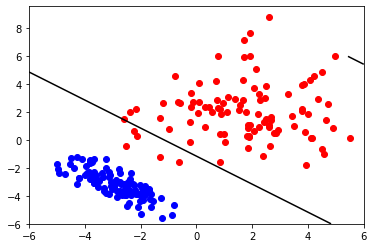

In [23]:
pi_1 = 0.5; pi_2 = 0.5
u = v = np.linspace(-6, 6, 50)
m = len(u)
w = np.zeros([m, m])
for i in range(m):
  for j in range(m):
    w[i, j] = np.log(pi_1) + f_1(u[i], v[j]) - np.log(pi_2) - f_2(u[i], v[j])

plt.contour(u, v, w, levels=1, colors=['black'])
plt.scatter(x_1, y_1, c='red')
plt.scatter(x_2, y_2, c='blue')

## multi classification

In [0]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
x = iris.data
y = iris.target
n = len(x)
train = np.random.choice(n, int(n/2), replace=False)
test = list(set(range(n)) - set(train))
# estimate parameter
X = x[train, :]
Y = y[train]
mu = []
covv =[]
for j in range(3):
  xx = X[Y==j, :]
  mu.append(np.mean(xx, 0))
  covv.append(np.cov(xx, rowvar=0))

In [0]:
def f(w, mu, inv, de):
  return -0.5 * (w - mu).T@inv@(w - mu) - 0.5 * np.log(de)

def g(v, j):
  return f(v, mu[j], np.linalg.inv(covv[j]), np.linalg.det(covv[j]))

In [28]:
z = []
for i in test:
  a = g(x[i, ], 0) + np.log(0.5); b = g(x[i, ], 1) + np.log(0.25); c = g(x[i, ], 2) + np.log(0.25)
  if a<b:
    if b<c:
      z.append(2)
    else:
      z.append(1)
  else:
    z.append(0)

u = y[test]
count = np.zeros([3, 3])
for i in range(int(n/2)):
  count[u[i], z[i]] += 1

count

array([[20.,  0.,  0.],
       [ 0., 26.,  2.],
       [ 0.,  1., 26.]])

# K-Nearest-Neighbor

In [0]:
def knn_1(x, y, z, k):
  """ knn for one target data
  """
  x = np.array(x); y = np.array(y)
  dis = []
  for i in range(x.shape[0]):
    dis.append(np.linalg.norm(z - x[i, ], ord=2))
  S = np.argsort(dis)[0:k]
  print(S)
  print(dis[S[0]], dis[S[1]], dis[S[2]])
  u = np.bincount(y[S])
  print(y[S])
  print(u)
  m = [i for i, x in enumerate(u) if x==max(u)]
  print(m)
  while (len(m)>1):
    k = k-1
    S = S[0:k]
    u = np.bincount(y[S])
    m = [i for i, x in enumerate(u) if x==max(u)]
  return m[0]

In [0]:
def knn(x, y, z, k):
  w = []
  for i in range(z.shape[0]):
    w.append(knn_1(x, y, z[i, ], k))
  return w

In [0]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()
iris.target_names
x = iris.data
y = iris.target
n = len(x)
train = np.random.choice(n, int(n/2), replace=False)
test = list(set(range(n)) - set(train))
w = knn_1(x[train, ], y[train], x[test[0], ], k=3)
print(w)
#w = knn(x[train, ], y[train], x[test, ], k=3)
#table_count(3, y[test], w)

[12 49 58]
0.09999999999999998 0.1414213562373093 0.14142135623730964
[0 0 0]
[3]
[0]
0


# ROC curve

In [0]:
N_0 = 10000; N_1 = 1000
mu_1 = 1; mu_0 = -1
var_1 = 1; var_0 = 1
x = np.random.normal(mu_0, var_0, N_0)
y = np.random.normal(mu_1, var_1, N_1)
theta_seq = np.exp(np.arange(-10, 100, 0.1))
U = []; V = []

In [53]:
theta_seq

array([4.53999298e-05, 5.01746821e-05, 5.54515994e-05, ...,
       1.99140616e+43, 2.20084417e+43, 2.43230897e+43])

In [54]:
x.shape, y.shape

((10000,), (1000,))

In [0]:
for i in range(len(theta_seq)):
  u = np.sum((stats.norm.pdf(x, mu_1, var_1) / stats.norm.pdf(x, mu_0, var_0))>theta_seq[i]) / N_0
  v = np.sum((stats.norm.pdf(y, mu_1, var_1) / stats.norm.pdf(y, mu_0, var_0))>theta_seq[i]) / N_1
  U.append(u); V.append(v)

In [56]:
len(U), len(V)

(1100, 1100)

In [0]:
AUC = 0
for i in range(len(theta_seq)-1):
  AUC += np.abs(U[i+1] - U[i])*V[i]

Text(0.3, 0.5, 'AUC=0.9216918000000001')

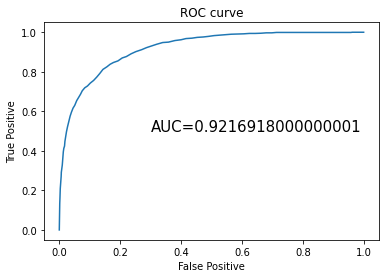

In [59]:
plt.plot(U, V)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.text(0.3, 0.5, 'AUC={}'.format(AUC), fontsize=15)